# Data clean approach by remocing all null values

In [2]:
# import datetime
# s=datetime.datetime.now()


In [3]:
# import pandas as pd
# import random
# import datetime
# df = pd.read_csv('dirty_data.csv')
# df['Data'] = [datetime.date.today() - datetime.timedelta(days=random.randint(1,165)) for i in range(200000)]


In [4]:
# df = df.rename(columns={'Data':'Date'})

In [5]:
# df.to_csv('dirty_data.csv',index=False)

# Data Cleaning and Preprocessing

In [30]:
import pandas as pd
df = pd.read_csv('dirty_data.csv')

# droping duplicates

df.drop_duplicates()
df = df[['Customer ID','Email Active','Mobile Active','City','Time Spent', 'Transaction_Amount', 'Product Code','Date']]
df

,Customer ID,Email Active,Mobile Active,City,Time Spent,Transaction_Amount,Product Code,Date
0,SF282694,1.0,0.0,Dakar,06:22:00,43.71,"['CUAR6713', 'QKOT2844', 'XAXZ3838', 'OQEC0645...",2024-03-08
1,TE728273,0.0,0.0,Ouled Moussa,21:39:38,466.27,"['WEMH5650', 'QKJY7652', 'SGIQ3300', 'ADJY3664...",2024-02-05
2,MS023187,1.0,1.0,Tacámbaro de Codallos,22:10:35,6916.92,"['DAUY5260', 'XTYP8097', 'ZOQS0126', 'WXSG1545...",2024-03-16
3,ET367185,1.0,0.0,Wanze,06:33:51,NaN,"['TXQG5693', 'LTPN2981', 'ONFN7108', 'BNAA2857...",2024-02-08
4,JG458278,0.0,0.0,Xihue-Xique,17:49:45,6647.11,[],2024-02-08
...,...,...,...,...,...,...,...,...
199995,HQ974646,0.0,1.0,Vierzon,17:35:16,2011.85,"['GLQX4238', 'HLPN8296', 'DVPT9828', 'CWNX2320...",2024-05-31
199996,LP668576,1.0,1.0,Hucclecote,08:29:56,7210.63,[],2024-06-15
199997,BG394075,1.0,0.0,Struga,17:35:14,NaN,"['RRDR6447', 'CEEO7453']",2024-04-11
199998,VR528159,0.0,1.0,NagXa,10:39:46,43.14,"['FZAX9549', 'BWSX1001']",2024-02-14


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer ID         190400 non-null  object 
 1   Email Active        192600 non-null  float64
 2   Mobile Active       193200 non-null  float64
 3   City                195400 non-null  object 
 4   Time Spent          193800 non-null  object 
 5   Transaction_Amount  147421 non-null  float64
 6   Product Code        191200 non-null  object 
 7   Date                200000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 12.2+ MB


In [8]:
useful_df = df[['Customer ID','Email Active','Mobile Active','City','Time Spent', 'Transaction_Amount', 'Product Code']]

# Removing missing values

removing the customer whose transaction is zero throughout

ALso removing data with no cutomer ID

In [31]:
df2 = df.groupby('Customer ID')
df3 = df2['Transaction_Amount'].sum().reset_index()
df3

,Customer ID,Transaction_Amount
0,AA116777,24791.220000
1,AA143732,12970.960000
2,AA205029,17882.800000
3,AA445608,29100.040000
4,AA600175,25446.950000
...,...,...
9993,ZZ650387,69510.400592
9994,ZZ708333,47975.439268
9995,ZZ882011,21599.420000
9996,ZZ926625,37181.657944


In [32]:

to_remove_cutomer_lst = df3[df3["Transaction_Amount"]==0]['Customer ID'].tolist()
df = df[(~df['Customer ID'].isin(to_remove_cutomer_lst)) & (df['Customer ID'].notnull())] # & (df['Transaction_Amount'].notnull())] -- removed it bcz a user can have another row with some amount transaction

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190400 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer ID         190400 non-null  object 
 1   Email Active        183365 non-null  float64
 2   Mobile Active       183942 non-null  float64
 3   City                186017 non-null  object 
 4   Time Spent          184489 non-null  object 
 5   Transaction_Amount  140370 non-null  float64
 6   Product Code        182004 non-null  object 
 7   Date                190400 non-null  object 
dtypes: float64(3), object(5)
memory usage: 13.1+ MB


# Removing Outliers

In [34]:
df['Transaction_Amount'].quantile(1)

38933.07324039676

In [36]:
df.count()

Customer ID           190400
Email Active          183365
Mobile Active         183942
City                  186017
Time Spent            184489
Transaction_Amount    140370
Product Code          182004
Date                  190400
dtype: int64

In [37]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    print(Q1,Q3)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 1 * IQR
    print(lower_bound,upper_bound)
    return df[~((df[column] < lower_bound) & (df[column] > upper_bound))]

df2 = remove_outliers(df,'Transaction_Amount')
df2


79.17 4254.7525000000005
-4096.4125 8430.335000000001


,Customer ID,Email Active,Mobile Active,City,Time Spent,Transaction_Amount,Product Code,Date
0,SF282694,1.0,0.0,Dakar,06:22:00,43.71,"['CUAR6713', 'QKOT2844', 'XAXZ3838', 'OQEC0645...",2024-03-08
1,TE728273,0.0,0.0,Ouled Moussa,21:39:38,466.27,"['WEMH5650', 'QKJY7652', 'SGIQ3300', 'ADJY3664...",2024-02-05
2,MS023187,1.0,1.0,Tacámbaro de Codallos,22:10:35,6916.92,"['DAUY5260', 'XTYP8097', 'ZOQS0126', 'WXSG1545...",2024-03-16
3,ET367185,1.0,0.0,Wanze,06:33:51,NaN,"['TXQG5693', 'LTPN2981', 'ONFN7108', 'BNAA2857...",2024-02-08
4,JG458278,0.0,0.0,Xihue-Xique,17:49:45,6647.11,[],2024-02-08
...,...,...,...,...,...,...,...,...
199995,HQ974646,0.0,1.0,Vierzon,17:35:16,2011.85,"['GLQX4238', 'HLPN8296', 'DVPT9828', 'CWNX2320...",2024-05-31
199996,LP668576,1.0,1.0,Hucclecote,08:29:56,7210.63,[],2024-06-15
199997,BG394075,1.0,0.0,Struga,17:35:14,NaN,"['RRDR6447', 'CEEO7453']",2024-04-11
199998,VR528159,0.0,1.0,NagXa,10:39:46,43.14,"['FZAX9549', 'BWSX1001']",2024-02-14


# Scaling 
not needed for now

# EDA

Visualising Outliers

<Axes: ylabel='Transaction_Amount'>

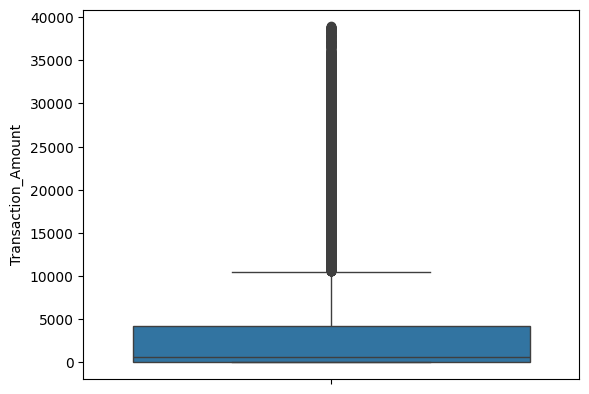

In [39]:
import seaborn as sns
sns.boxplot(df['Transaction_Amount'],width=0.8)


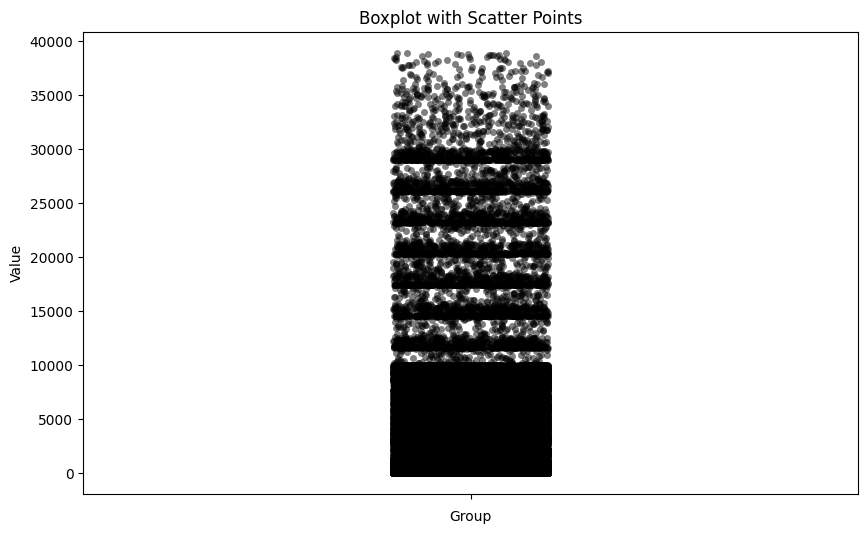

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create sample data
np.random.seed(0)
data = pd.DataFrame({
    'group': np.repeat(['A', 'B', 'C', 'D'], 50),
    'value': np.random.randn(200)
})

# Set up the plot
plt.figure(figsize=(10, 6))

# Create boxplot
# sns.boxplot(y=df['Transaction_Amount'], data=data, palette='Set3')

# Add scatter points
sns.stripplot(y=df['Transaction_Amount'], data=data, color='black', alpha=0.5, jitter=True)

# Customize the plot
plt.title('Boxplot with Scatter Points')
plt.xlabel('Group')
plt.ylabel('Value')

# Show the plot
plt.show()

# CLTV CALCULATION


In [ ]:
for i in 

In [5]:
useful_df['CLTV'] = 